In [198]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from scipy.stats import loguniform

from qga import QGA
from dopnet_loader import DopNetLoader
from preprocessor import Preprocessor
from feature_extractor import FeatureExtractor
from enums import ExtractorMode, GESTURE_NAMES


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:
DATA_PATH = "../DATA/raw_mat/Training Data"
loader_raw = DopNetLoader(DATA_PATH)
loader_raw._load_all()
data_raw = loader_raw.data

Found 6 .mat files

=== SUMMARY ===
Person: A:
  Gesture 0: 56 samples
  Gesture 1: 98 samples
  Gesture 2: 64 samples
  Gesture 3: 105 samples
Person: B:
  Gesture 0: 112 samples
  Gesture 1: 116 samples
  Gesture 2: 72 samples
  Gesture 3: 105 samples
Person: C:
  Gesture 0: 85 samples
  Gesture 1: 132 samples
  Gesture 2: 80 samples
  Gesture 3: 137 samples
Person: D:
  Gesture 0: 70 samples
  Gesture 1: 112 samples
  Gesture 2: 71 samples
  Gesture 3: 93 samples
Person: E:
  Gesture 0: 56 samples
  Gesture 1: 98 samples
  Gesture 2: 91 samples
  Gesture 3: 144 samples
Person: F:
  Gesture 0: 87 samples
  Gesture 1: 140 samples
  Gesture 2: 101 samples
  Gesture 3: 208 samples


In [221]:
# Load data
DATA_PATH = "../DATA/raw_mat/Training Data"
loader = DopNetLoader(DATA_PATH)
data = loader.load_normalized(target_shape=(256, 256))

Found 6 .mat files

=== SUMMARY ===
Person: A:
  Gesture 0: 56 samples
  Gesture 1: 98 samples
  Gesture 2: 64 samples
  Gesture 3: 105 samples
Person: B:
  Gesture 0: 112 samples
  Gesture 1: 116 samples
  Gesture 2: 72 samples
  Gesture 3: 105 samples
Person: C:
  Gesture 0: 85 samples
  Gesture 1: 132 samples
  Gesture 2: 80 samples
  Gesture 3: 137 samples
Person: D:
  Gesture 0: 70 samples
  Gesture 1: 112 samples
  Gesture 2: 71 samples
  Gesture 3: 93 samples
Person: E:
  Gesture 0: 56 samples
  Gesture 1: 98 samples
  Gesture 2: 91 samples
  Gesture 3: 144 samples
Person: F:
  Gesture 0: 87 samples
  Gesture 1: 140 samples
  Gesture 2: 101 samples
  Gesture 3: 208 samples


In [237]:
# Data structure check
GESTURE_NAMES = ['Wave', 'Pinch', 'Swipe', 'Click']
person = list(data.keys())[0]

gestures = data[person]
gestures_raw = data_raw[person]

print(f'Person: {person}')
print(f'Gesture count: {len(gestures)}')
for i in range(4):
    print(f'Number of repetitions for a gesture "{GESTURE_NAMES[i]}": {len(gestures[i])}')

example = gestures[0][0]
print('Shape of example spectrogram:', example.shape)


Person: A
Gesture count: 4
Number of repetitions for a gesture "Wave": 56
Number of repetitions for a gesture "Pinch": 98
Number of repetitions for a gesture "Swipe": 64
Number of repetitions for a gesture "Click": 105
Shape of example spectrogram: (256, 256)


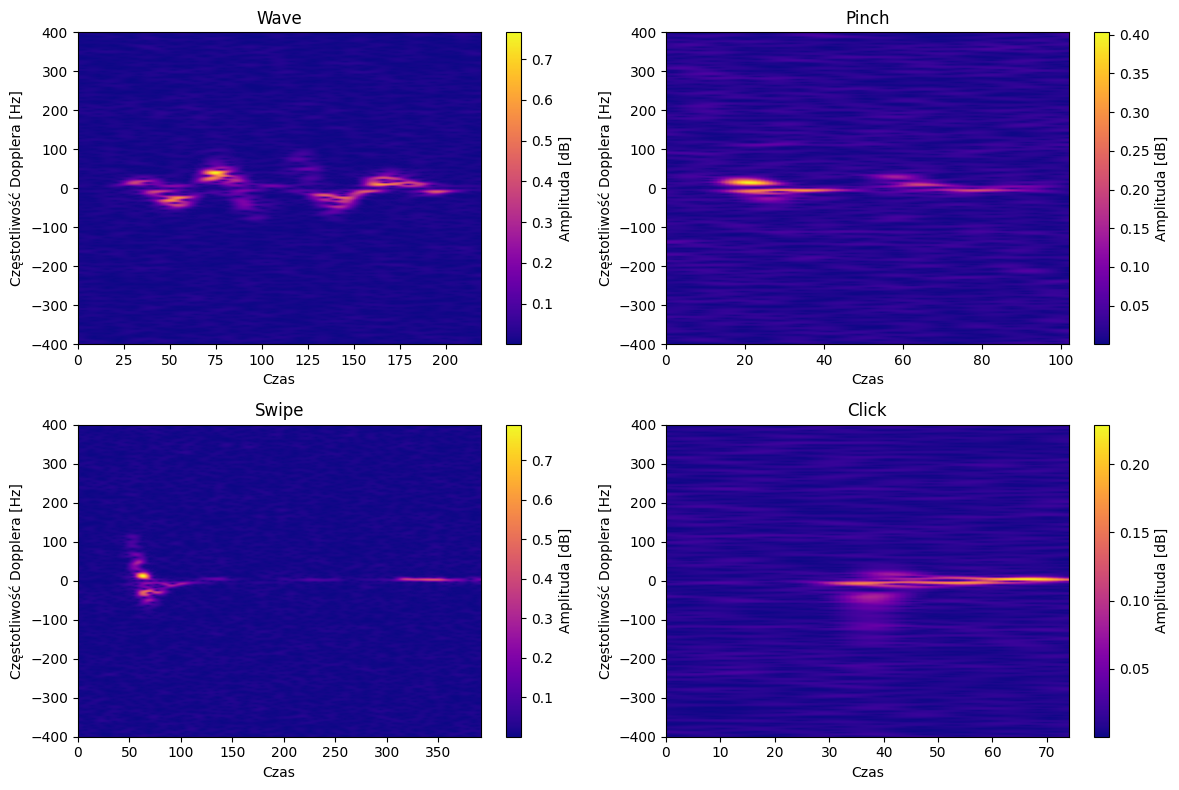

In [240]:
plt.figure(figsize=(12, 8))

for i in range(4):
    spec = np.abs(gestures_raw[i][11]) 
    rows, cols = spec.shape
    extent = [0, cols, -rows//2, rows//2]

    plt.subplot(2, 2, i+1)

    plt.imshow(spec, aspect="auto", cmap="plasma", origin='lower', extent=extent)
    
    plt.title(f"{GESTURE_NAMES[i]}")
    plt.colorbar(label="Amplituda [dB]")
    
    plt.xlabel('Czas')
    plt.ylabel('Częstotliwość Dopplera [Hz]')

plt.tight_layout()
plt.show()

In [241]:
# Features extraction
extractor = FeatureExtractor(mode=ExtractorMode.Magnitude)
X, y = extractor.transform(data)

=== FeatureExtractor ===
Mode: ExtractorMode.Magnitude
  Processing person: A
    Gesture: Wave, repetitions: 56
    Gesture: Pinch, repetitions: 98
    Gesture: Swipe, repetitions: 64
    Gesture: Click, repetitions: 105
  Processing person: B
    Gesture: Wave, repetitions: 112
    Gesture: Pinch, repetitions: 116
    Gesture: Swipe, repetitions: 72
    Gesture: Click, repetitions: 105
  Processing person: C
    Gesture: Wave, repetitions: 85
    Gesture: Pinch, repetitions: 132
    Gesture: Swipe, repetitions: 80
    Gesture: Click, repetitions: 137
  Processing person: D
    Gesture: Wave, repetitions: 70
    Gesture: Pinch, repetitions: 112
    Gesture: Swipe, repetitions: 71
    Gesture: Click, repetitions: 93
  Processing person: E
    Gesture: Wave, repetitions: 56
    Gesture: Pinch, repetitions: 98
    Gesture: Swipe, repetitions: 91
    Gesture: Click, repetitions: 144
  Processing person: F
    Gesture: Wave, repetitions: 87
    Gesture: Pinch, repetitions: 140
    Gesture:

In [242]:
# Preprocessing
preprocessor = Preprocessor(n_components=110)

=== PCA Elbow Method ===


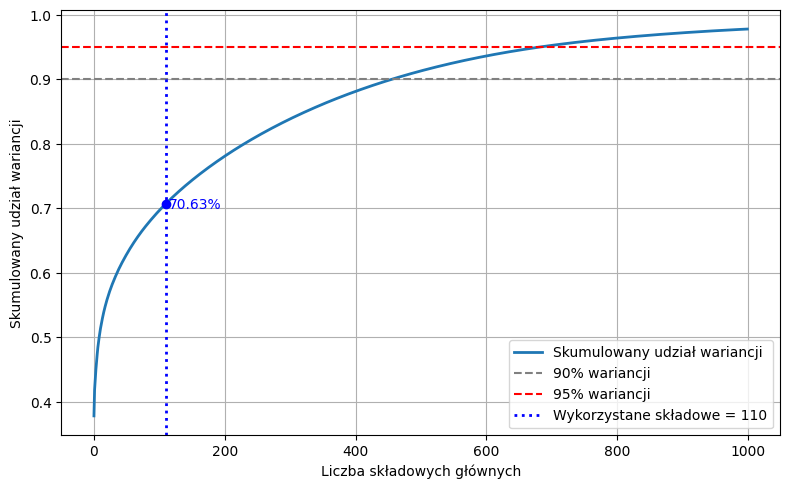

In [20]:
preprocessor.plot_elbow(X, max_components=1000, save_as_file=True, include_title = False)

In [243]:
X_pca = preprocessor.fit_transform(X)

=== Preprocessor.fit_transform ===
Input X shape: (2433, 65536)
Scaling done.
PCA done. Shape after PCA: (2433, 110)


Test Data Accuracy: 0.9260780287474333

Classification Report:
               precision    recall  f1-score   support

       Click       0.96      0.91      0.94       159
       Pinch       0.88      0.95      0.91       139
       Swipe       0.95      0.95      0.95        96
        Wave       0.92      0.89      0.91        93

    accuracy                           0.93       487
   macro avg       0.93      0.93      0.93       487
weighted avg       0.93      0.93      0.93       487



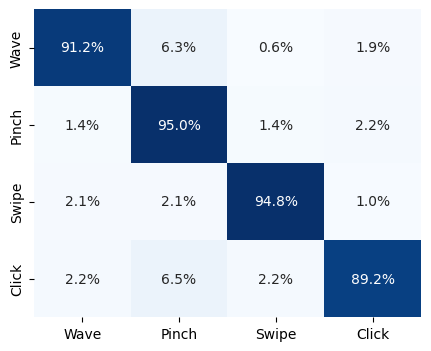

Cross-validation accuracy: 0.9265242897633643


In [267]:

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
labels = GESTURE_NAMES

baseline = SVC(kernel="rbf")
baseline.fit(X_train, y_train)

y_pred = baseline.predict(X_test)

print('Test Data Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

cm_svm = confusion_matrix(y_test, y_pred, normalize="true")

annot = np.array([[f"{v*100:.1f}%" for v in row] for row in cm_svm])

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_svm,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    cbar=False
)
plt.savefig('baseline_svm_cm', dpi=300, bbox_inches='tight')
plt.show()

baseline_cv = cross_val_score(baseline, X_train, y_train, cv=5).mean()
print(f'Cross-validation accuracy: {baseline_cv}')

In [176]:
param_grid = {
    'C': np.logspace(-1, 4, 20),
    'gamma': np.logspace(-5, 1, 20)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=SVC(kernel='rbf'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("\n=== Best Grid Search Parameters ===")
print(grid.best_params_)
print(f"Best CV score: {grid.best_score_:.4f}")
best_model = grid.best_estimator_

test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits

=== Best Grid Search Parameters ===
{'C': np.float64(6.951927961775605), 'gamma': np.float64(4.281332398719396e-05)}
Best CV score: 0.9692
Test accuracy: 0.9651


=== MLP Stratified 5-Fold Cross-Validation ===
Fold scores: [0.9589 0.9425 0.9507 0.965  0.9403]
Mean accuracy: 0.9515
Std accuracy:  0.0094

=== Hold-Out Test Results ===
Test Accuracy: 0.9425051334702259

Classification Report:
               precision    recall  f1-score   support

       Click       0.94      0.96      0.95       159
       Pinch       0.92      0.96      0.94       139
       Swipe       0.99      0.92      0.95        96
        Wave       0.92      0.92      0.92        93

    accuracy                           0.94       487
   macro avg       0.95      0.94      0.94       487
weighted avg       0.94      0.94      0.94       487



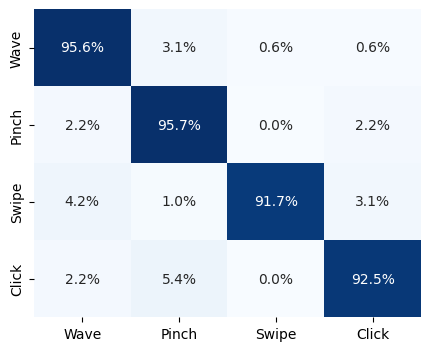

In [265]:
le = LabelEncoder()
y_enc = le.fit_transform(y)

mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    batch_size=32,
    learning_rate_init=1e-3,
    max_iter=300,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10,
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp, X_pca, y_enc, cv=cv)

print("=== MLP Stratified 5-Fold Cross-Validation ===")
print("Fold scores:", np.round(cv_scores, 4))
print("Mean accuracy:", np.round(cv_scores.mean(), 4))
print("Std accuracy: ", np.round(cv_scores.std(), 4))

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

print("\n=== Hold-Out Test Results ===")
print("Test Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels))

cm_mlp = confusion_matrix(y_test_labels, y_pred_labels, normalize="true")

annot = np.array([[f"{v*100:.1f}%" for v in row] for row in cm_mlp])

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_mlp,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    cbar=False
)
#plt.title('MLP - Confusion Matrix')
plt.savefig('mlp_cm', dpi=300, bbox_inches='tight')
plt.show()



In [250]:
print('=== RUNNING QGA ===')
qga = QGA(
    X_train,
    y_train,
    population_size=20,
    genome_length=20,
    generations=40,
    verbose_logging=False,
    min_C = -1,
    max_C = 4,
    min_gamma = -5,
    max_gamma = 1,
    theta_min = 0.01,
    theta_max = 0.05,
)
best_C, best_gamma = qga.run()
#3.54m

=== RUNNING QGA ===
--- STARTING IMPROVED QUANTUM GENETIC ALGORITHM (IQGA-SVM) ---


Optimization Finished.
Best Accuracy: 97.17%
Best Parameters: C=35.58932, Gamma=0.00005


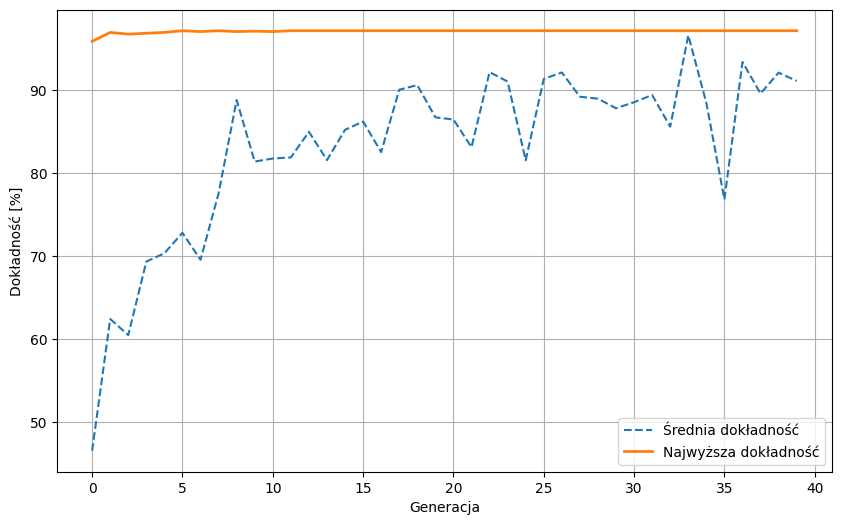

In [251]:
qga.plot_output(save_as_file=True, include_title=False)

In [252]:
print("Best C:", best_C)
print("Best gamma:", best_gamma)

Best C: 35.5893165592484
Best gamma: 5.409259667312205e-05


Test Accuracy: 0.971252566735113

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.96      0.97      0.97       139
           2       0.99      0.97      0.98        96
           3       0.93      0.98      0.95        93

    accuracy                           0.97       487
   macro avg       0.97      0.97      0.97       487
weighted avg       0.97      0.97      0.97       487



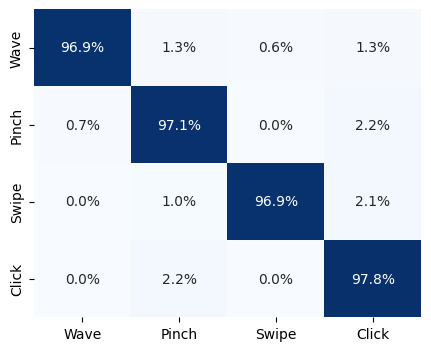

Cross-validation accuracy: 0.9717368663898227


In [264]:
# SVM trained with QGA parameters

svm_qga = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_qga.fit(X_train, y_train)

y_pred_qga = svm_qga.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_qga))
print("\nClassification Report:\n", classification_report(y_test, y_pred_qga))

cm_qga = confusion_matrix(y_test, y_pred_qga, normalize="true")

annot = np.array([[f"{v*100:.1f}%" for v in row] for row in cm_qga])

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_qga,
    annot=annot,
    fmt="",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    cbar=False
)
#plt.title('QGA-tuned SVM - Confusion Matrix')
plt.savefig('iqga_svm_cm', dpi=300, bbox_inches='tight')
plt.show()

cv_qga = cross_val_score(svm_qga, X_train, y_train, cv=5).mean()
print("Cross-validation accuracy:", cv_qga)